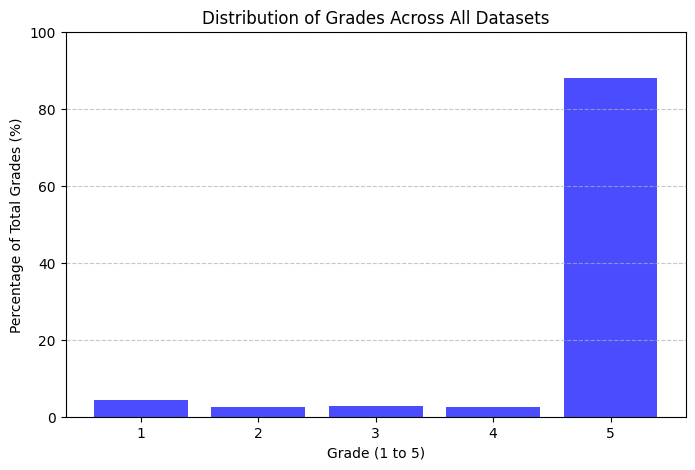

Graph saved as grade_distribution.png


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# File paths for graded summaries of different models
graded_files = {
    "GPT-Neo-125M": "graded_test_summaries_GPT-Neo-125M.csv",
    "Phi-1.5B": "graded_test_summaries_Phi-1.5B.csv",
    "Bloom": ["graded_biographies_part1_bloom.csv", "graded_biographies_part2_bloom.csv"],
    "Llama2": ["graded_biographies_part1_llama2.csv", "graded_biographies_part2_llama2.csv", "graded_biographies_part3_llama2.csv"]
}

# Dictionary to store grades
grade_data = {}

# Load and combine grades for each model
for model, files in graded_files.items():
    all_grades = []
    if isinstance(files, list):  # If multiple files exist for a model
        for file in files:
            df = pd.read_csv(file)
            all_grades.extend(df["grade"].tolist())
    else:  # Single file
        df = pd.read_csv(files)
        all_grades.extend(df["grade"].tolist())

    grade_data[model] = all_grades

# Plot the distributions
plt.figure(figsize=(10, 6))

for model, grades in grade_data.items():
    sns.kdeplot(grades, label=model, fill=True, alpha=0.4)

plt.xlabel("Grade (1 to 5)")
plt.ylabel("Density")
plt.title("Comparison of Grade Distributions Across Models")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

# Save the plot
comparison_plot_path = "grade_distribution_comparison.png"
plt.savefig(comparison_plot_path, dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

print(f"Comparison plot saved as {comparison_plot_path}")
